In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
holdout = pd.read_csv('test.csv')

In [2]:
holdout

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
def process_db_combined(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_titles(df)
    df = process_fare(df)
    df = process_cabin(df)
    for col in ['Age_categories', 'Fare_categories', 'Title', 
                'Cabin_type', 'Sex']:
        df = create_dummies(df, col)
    return df
train = process_db_combined(train)
holdout = process_db_combined(holdout)

## Exploring SibSp and Parch columns

In [4]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [5]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

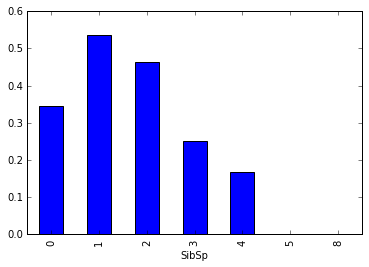

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
train.pivot_table(index='SibSp', values="Survived").plot.bar()
plt.show()

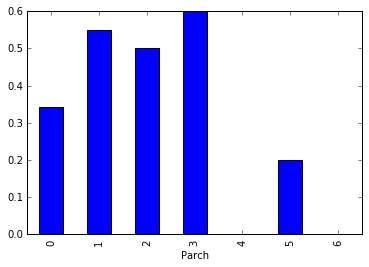

In [7]:
train.pivot_table(index='Parch', values="Survived").plot.bar()
plt.show()

In [8]:
train_corr = train.corr()

train_corr['SibSp']['Parch']

0.41483769862015263

correlated...

In [9]:
# combining parch and sibsp

train['Parch_sibs'] = train['Parch'] + train['SibSp']
holdout['Parch_sibs'] = holdout['Parch'] + holdout['SibSp']
print(train['Parch_sibs'].value_counts(normalize=True), 
      train['Parch'].value_counts(normalize=True),
      train['SibSp'].value_counts(normalize=True))


0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: Parch_sibs, dtype: float64 0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64 0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64


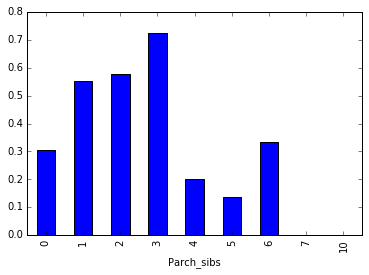

In [10]:
train.pivot_table(index="Parch_sibs", values="Survived").plot.bar()
plt.show()

Only 30% of people who were alone on the ship survived

In [11]:
def isalone(df):    
    for idx, row in df.iterrows():
        #print(row['isalone'])
        if row['Parch_sibs'] == 0:
            df.loc[idx,'isalone'] = 1
        else:
            df.loc[idx, 'isalone'] = 0
    df = df.drop('Parch_sibs', axis=1)
    return(df)
train = isalone(train)
holdout = isalone(holdout)

# Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def RFECV_selection(df):
    df = df.select_dtypes(include=['float64', 'int', 'uint8']).dropna(axis=1)
    all_X = df.drop(['Survived', 'PassengerId'], axis=1)
    all_y = df['Survived']
    rf = RandomForestClassifier(random_state=1)
    rfecv = RFECV(rf, cv=10)
    rfecv.fit(all_X, all_y)
    print("best features \n _________________ \n", 
          list(all_X.columns[rfecv.support_]))
    return list(all_X.columns[rfecv.support_])

columns = RFECV_selection(train)

best features 
 _________________ 
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_categories_Missing', 'Age_categories_Infant', 'Age_categories_Young Adult', 'Fare_categories_12-50', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'isalone']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def model_selector(df, features):
    all_X = train[features]
    all_y = train['Survived']
    
    models = [{
        "name": 'K Neighbors Classifier', 
        'estimator':KNeighborsClassifier(),
        'hyperparameters': {
            'n_neighbors': range(1,20,2),
            'weights': ['distance', 'uniform'],
            'algorithm': ['ball_tree', 'kd_tree', 'brute'],
            'p': [1,2]
        }
    }, 
    {
        "name": 'Logistic Regression',
        'estimator':LogisticRegression(),
        'hyperparameters': {
            "solver": ["newton-cg", "lbfgs", "liblinear"], 
        }
        
    }, 
    {
        'name': "Random Forest Classifier",
        'estimator':RandomForestClassifier(random_state=1), 
        'hyperparameters': {
            "n_estimators": [4, 6, 9],
            "criterion": ["entropy", "gini"],
            "max_depth": [2, 5, 10],
            "max_features": ["log2", "sqrt"],
            "min_samples_leaf": [1, 5, 8],
            "min_samples_split": [2, 3, 5]
        }
    }]
    for model in models:
        print(model['name'], "\n_____________\n")
        grid = GridSearchCV(model["estimator"], 
                            param_grid=model["hyperparameters"], 
                           cv = 10)
        grid.fit(all_X, all_y)
        model['best model'] = grid.best_estimator_
        model['best parameters'] = grid.best_params_
        model['best score'] = grid.best_score_
        print('best score:',grid.best_score_)
        print('best parameters:', grid.best_params_)
        print("\n\n")
    return models
best_models = model_selector(train, columns)
        
    

K Neighbors Classifier 
_____________

best score: 0.775533108866
best parameters: {'n_neighbors': 5, 'algorithm': 'brute', 'weights': 'uniform', 'p': 1}



Logistic Regression 
_____________



## Kaggle submission:

In [ ]:
def save_submission_file(model, columns, filename="submission.csv"):
    predictions = model.predict(holdout[columns])
    submission_df = pd.DataFrame({
        "PassengerID": holdout['PassengerID'],
        "Survived": predictions})
    submission_df.to_csv(filename, index=False)
#best model from testing above was RandomForest
best_model = best_models[2]['best model']
save_submission_file(best_model, columns)